# Micro-Study 2: Relating Uranium Concentration with other parameters
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("uranium2.csv")
df.head()

,Year,State,District,Block/Taluka,Location/Site/Village,Latitude,Longitude,pH,EC (µS/cm),CO3 (mg/L),...,Total Hardness,Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),SiO2,TDS,Fe (ppm),As (ppb),U (ppb)
0,2023,Punjab,Amritsar,NaN,Jagdev Khurd (Dalla),31.9070,74.7391,7.58,1233.0,0.0,...,380.0,96.0,34.0,65.0,14.00,NaN,NaN,1.11,35.90,0.57
1,2023,Punjab,Amritsar,NaN,Laungo Mahal,31.9059,74.8189,7.96,683.0,0.0,...,200.0,40.0,24.0,87.0,6.00,NaN,NaN,0.04,54.06,3.77
2,2023,Punjab,Amritsar,NaN,Makowal,31.9046,74.8904,8.20,412.0,0.0,...,180.0,32.0,24.0,21.0,7.00,NaN,NaN,0.05,44.44,3.04
3,2023,Punjab,Amritsar,NaN,Malakpur,31.9534,74.8453,8.20,442.0,0.0,...,170.0,32.0,22.0,20.0,5.00,NaN,NaN,1.76,35.85,1.04
4,2023,Punjab,Amritsar,NaN,Ramdas,31.9667,74.9111,8.10,373.0,0.0,...,110.0,24.0,12.0,47.0,4.00,NaN,NaN,0.05,36.31,0.11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4281 non-null   object 
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4273 non-null   object 
 13  SO4 (mg/L)             4272 non-null   object 
 14  NO3 (mg/L)             4273 non-null   object 
 15  PO4 

## EDA
---

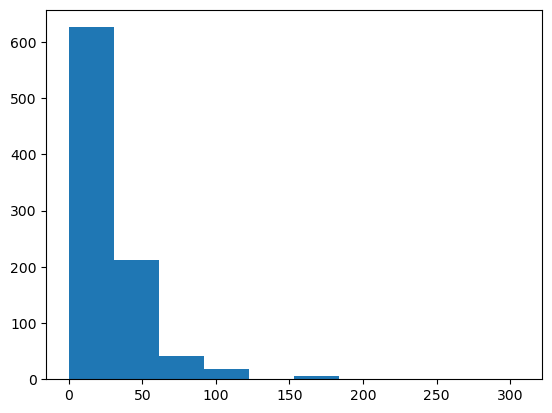

In [4]:
plt.hist(df["U (ppb)"])
plt.show()

In [20]:
sns.pairplot(df)

KeyboardInterrupt: 

## Data Cleaning
---

In [4]:
df_clean = df.copy(deep=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4281 non-null   object 
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4273 non-null   object 
 13  SO4 (mg/L)             4272 non-null   object 
 14  NO3 (mg/L)             4273 non-null   object 
 15  PO4 

### From pH `object` to `float`

In [5]:
# Seeing why: this gives a list of  all unique non-float types
df["pH"][pd.to_numeric(df["pH"], errors="coerce").isna()].value_counts()

pH
Leaked    8
Name: count, dtype: int64

In [6]:
# Fixing this with NAs
df_clean["pH"] = pd.to_numeric(df["pH"], errors="coerce")

In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4273 non-null   float64
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4273 non-null   object 
 13  SO4 (mg/L)             4272 non-null   object 
 14  NO3 (mg/L)             4273 non-null   object 
 15  PO4 

### From F `object` to `float`

In [8]:
df["F (mg/L)"][pd.to_numeric(df["F (mg/L)"], errors="coerce").isna()].value_counts()

F (mg/L)
ND       1
<0.05    1
Name: count, dtype: int64

In [9]:
df_clean["F (mg/L)"] = df["F (mg/L)"].replace("<0.05", 0.05)
df_clean["F (mg/L)"] = df_clean["F (mg/L)"].replace("ND", np.nan)
df_clean["F (mg/L)"] = pd.to_numeric(df_clean["F (mg/L)"], errors="coerce")

In [10]:
df_clean["F (mg/L)"][
    pd.to_numeric(df_clean["F (mg/L)"], errors="coerce").isna()
].value_counts()

Series([], Name: count, dtype: int64)

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4273 non-null   float64
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4272 non-null   float64
 13  SO4 (mg/L)             4272 non-null   object 
 14  NO3 (mg/L)             4273 non-null   object 
 15  PO4 

### Same with SO4, NO3, and PO4

In [12]:
df["SO4 (mg/L)"][pd.to_numeric(df["SO4 (mg/L)"], errors="coerce").isna()].value_counts()

SO4 (mg/L)
BDL    62
ND      1
Name: count, dtype: int64

In [13]:
df_clean["SO4 (mg/L)"] = pd.to_numeric(df["SO4 (mg/L)"], errors="coerce")

In [14]:
df_clean["SO4 (mg/L)"][
    pd.to_numeric(df_clean["SO4 (mg/L)"], errors="coerce").isna()
].value_counts()

Series([], Name: count, dtype: int64)

In [15]:
df["NO3 (mg/L)"][pd.to_numeric(df["NO3 (mg/L)"], errors="coerce").isna()].value_counts()

NO3 (mg/L)
BDL    26
Name: count, dtype: int64

In [16]:
df_clean["NO3 (mg/L)"] = pd.to_numeric(df["NO3 (mg/L)"], errors="coerce")

In [17]:
df_clean["NO3 (mg/L)"][
    pd.to_numeric(df_clean["NO3 (mg/L)"], errors="coerce").isna()
].value_counts()

Series([], Name: count, dtype: int64)

In [18]:
df["PO4 (mg/L)"][pd.to_numeric(df["PO4 (mg/L)"], errors="coerce").isna()].value_counts()

PO4 (mg/L)
<0.10    332
<0.1     208
<0.01     59
ND         1
Name: count, dtype: int64

In [19]:
df_clean["PO4 (mg/L)"] = df_clean["PO4 (mg/L)"].str.replace("<", "")
df_clean["PO4 (mg/L)"] = pd.to_numeric(df_clean["PO4 (mg/L)"], errors="coerce")

In [20]:
df_clean["PO4 (mg/L)"][
    pd.to_numeric(df_clean["PO4 (mg/L)"], errors="coerce").isna()
].value_counts()

Series([], Name: count, dtype: int64)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4273 non-null   float64
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4272 non-null   float64
 13  SO4 (mg/L)             4209 non-null   float64
 14  NO3 (mg/L)             4247 non-null   float64
 15  PO4 

### K & SiO2 `object` to `float`

In [22]:
df["K (mg/L)"][pd.to_numeric(df["K (mg/L)"], errors="coerce").isna()].value_counts()

K (mg/L)
<1    1
Name: count, dtype: int64

In [23]:
df_clean["K (mg/L)"] = df["K (mg/L)"].str.replace("<", "")
df_clean["K (mg/L)"] = pd.to_numeric(df_clean["K (mg/L)"], errors="coerce")

In [24]:
df_clean["K (mg/L)"][
    pd.to_numeric(df_clean["K (mg/L)"], errors="coerce").isna()
].value_counts()

Series([], Name: count, dtype: int64)

In [25]:
df["SiO2"][pd.to_numeric(df["SiO2"], errors="coerce").isna()].value_counts()

SiO2
ND    1
Name: count, dtype: int64

In [26]:
df_clean["SiO2"] = pd.to_numeric(df["SiO2"], errors="coerce")
df_clean["SiO2"][pd.to_numeric(df_clean["SiO2"], errors="coerce").isna()].value_counts()

Series([], Name: count, dtype: int64)

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4281 non-null   int64  
 1   State                  4281 non-null   object 
 2   District               4281 non-null   object 
 3   Block/Taluka           3345 non-null   object 
 4   Location/Site/Village  4281 non-null   object 
 5   Latitude               4281 non-null   float64
 6   Longitude              4281 non-null   float64
 7   pH                     4273 non-null   float64
 8   EC (µS/cm)             4273 non-null   float64
 9   CO3 (mg/L)             4273 non-null   float64
 10  HCO3 (mg/L)            4273 non-null   float64
 11  Cl (mg/L)              4273 non-null   float64
 12  F (mg/L)               4272 non-null   float64
 13  SO4 (mg/L)             4209 non-null   float64
 14  NO3 (mg/L)             4247 non-null   float64
 15  PO4 

In [28]:
df_clean.head()

,Year,State,District,Block/Taluka,Location/Site/Village,Latitude,Longitude,pH,EC (µS/cm),CO3 (mg/L),...,Total Hardness,Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),SiO2,TDS,Fe (ppm),As (ppb),U (ppb)
0,2023,Punjab,Amritsar,NaN,Jagdev Khurd (Dalla),31.9070,74.7391,7.58,1233.0,0.0,...,380.0,96.0,34.0,65.0,14.0,NaN,NaN,1.11,35.90,0.57
1,2023,Punjab,Amritsar,NaN,Laungo Mahal,31.9059,74.8189,7.96,683.0,0.0,...,200.0,40.0,24.0,87.0,6.0,NaN,NaN,0.04,54.06,3.77
2,2023,Punjab,Amritsar,NaN,Makowal,31.9046,74.8904,8.20,412.0,0.0,...,180.0,32.0,24.0,21.0,7.0,NaN,NaN,0.05,44.44,3.04
3,2023,Punjab,Amritsar,NaN,Malakpur,31.9534,74.8453,8.20,442.0,0.0,...,170.0,32.0,22.0,20.0,5.0,NaN,NaN,1.76,35.85,1.04
4,2023,Punjab,Amritsar,NaN,Ramdas,31.9667,74.9111,8.10,373.0,0.0,...,110.0,24.0,12.0,47.0,4.0,NaN,NaN,0.05,36.31,0.11


## Initial EDA
---

In [32]:
# Dropping non-numeric shit
df_numeric = df_clean.drop(columns=df_clean.columns[1:5])
df_numeric.head()

,Year,Latitude,Longitude,pH,EC (µS/cm),CO3 (mg/L),HCO3 (mg/L),Cl (mg/L),F (mg/L),SO4 (mg/L),...,Total Hardness,Ca (mg/L),Mg (mg/L),Na (mg/L),K (mg/L),SiO2,TDS,Fe (ppm),As (ppb),U (ppb)
0,2023,31.9070,74.7391,7.58,1233.0,0.0,476.0,92.0,0.61,19.0,...,380.0,96.0,34.0,65.0,14.0,NaN,NaN,1.11,35.90,0.57
1,2023,31.9059,74.8189,7.96,683.0,0.0,415.0,35.0,0.62,0.0,...,200.0,40.0,24.0,87.0,6.0,NaN,NaN,0.04,54.06,3.77
2,2023,31.9046,74.8904,8.20,412.0,0.0,254.0,21.0,0.56,0.0,...,180.0,32.0,24.0,21.0,7.0,NaN,NaN,0.05,44.44,3.04
3,2023,31.9534,74.8453,8.20,442.0,0.0,220.0,21.0,0.48,0.0,...,170.0,32.0,22.0,20.0,5.0,NaN,NaN,1.76,35.85,1.04
4,2023,31.9667,74.9111,8.10,373.0,0.0,238.0,14.0,0.83,0.0,...,110.0,24.0,12.0,47.0,4.0,NaN,NaN,0.05,36.31,0.11


<Axes: >

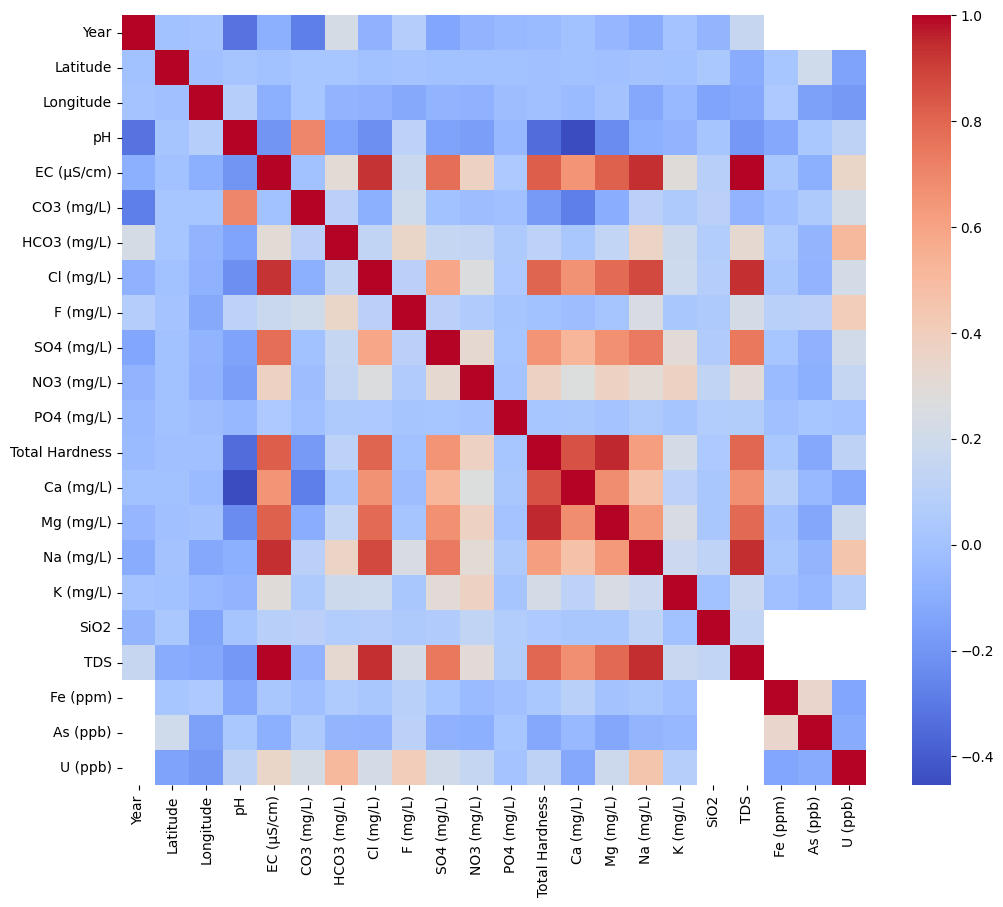

In [40]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), cmap="coolwarm")